## Phase 1 - Modeling Sequence 

### 1 - Scale all datasets
### 2 - Create baseline Model and log score

### 3 - Create Linear Regression and log score
         - Evaluate Model
### 4 - Model Regularization
        - Create RidgeCV model and find most optimal value for alpha and log score
        - Create LassoCV model and find most optimal value for alpha and log score
            - List all features for which Lasso model made coefficients as zero.
            - Plot a bar chart to show relative size of the coefficients 
        - Create ElasticNetCV model  find most optimal value for alpha and log score
### 5 - Apply final selected model to Test dataset & submit prediction to Kaggle

In [24]:
import numpy as np
import pandas as pd
#import patsy
import math

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [25]:
#import cleaned, transformed and with selected freatures datasets into pandas dataframes.
orig_test = pd.read_csv('../datasets/test.csv')
test = pd.read_csv('../datasets/test_for_mod.csv')
X_train = pd.read_csv('../datasets/x_train_for_mod.csv')
X_test = pd.read_csv('../datasets/x_test_for_mod.csv')
y_train = pd.read_csv('../datasets/y_train_for_mod.csv')
y_test = pd.read_csv('../datasets/y_test_for_mod.csv')
y_baseline = pd.read_csv('../datasets/y_test_for_mod.csv') # for baseline model 

In [26]:
#Dropping SalePrice from df and df_test dataframes  
X_train.drop(['SalePrice'],axis=1,inplace=True)
X_test.drop(['SalePrice'],axis=1,inplace=True)


In [27]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(test.shape)

(1526, 52) (513, 52) (1526, 1) (513, 1)
(879, 52)


In [28]:
X_train.columns

Index(['Lot Area', 'Lot Shape', 'Overall Qual', 'Mas Vnr Area', 'Exter Qual',
       'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'Total Bsmt SF', 'Heating QC', 'Central Air', '1st Flr SF',
       'Gr Liv Area', 'Full Bath', 'Kitchen Qual', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Cars', 'Garage Area', 'vintage', 'new_age',
       'garage_age', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Greens', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Nei

## 1 - Scale all data

In [29]:
# Scaling the train, validation and test datasets  
ss1 = StandardScaler()
ss1.fit(X_train)
X_train_scaled = ss1.transform(X_train) 
X_test_scaled = ss1.transform(X_test) 
test_scaled = ss1.transform(test) 

## 2 - Create Baseline Model & log R2 & MSE scores


**Fill y_baseline['SalePrice] with mean of Saleprice train dataset and use y_test as actual data to ccompure R2m MSE and RMSE for y_baseline.**

In [30]:
y_baseline['SalePrice'] = y_train['SalePrice'].mean()

In [31]:
y_train.mean()

SalePrice    179709.131062
dtype: float64

In [32]:
y_baseline.head()

,SalePrice
0,179709.131062
1,179709.131062
2,179709.131062
3,179709.131062
4,179709.131062


In [33]:
print('R2 score for the baseline model on validation dataset:', metrics.r2_score(y_test,y_baseline))
print('MSE score for the baseline model on validation dataset::', metrics.mean_squared_error(y_test,y_baseline))
print('RMSE score for the baseline model on validation dataset:', math.sqrt(metrics.mean_squared_error(y_test,y_baseline)))



R2 score for the baseline model on validation dataset: -0.0006156545387887569
MSE score for the baseline model on validation dataset:: 4858364177.975382
RMSE score for the baseline model on validation dataset: 69701.9668156888


## 3 - Create Linear Regression and log scores

In [34]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_preds = lr.predict(X_test_scaled)
print(f'R2 of LR model on X_train: {lr.score(X_train_scaled,y_train)}')
print(f'R2 of LR model on X_test: {lr.score(X_test_scaled,y_test)}')
print(f'MSE of LR on X_train data:{metrics.mean_squared_error(y_train, lr.predict(X_train_scaled))}')
print(f'MSE of LR on X_test data:{metrics.mean_squared_error(y_test, lr.predict(X_test_scaled))}')
print(f'RMSE of LR on X_test data:{math.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test_scaled)))}')

R2 of LR model on X_train: 0.8682261301880155
R2 of LR model on X_test: 0.8154686074094704
MSE of LR on X_train data:750682679.5139594
MSE of LR on X_test data:895969100.0306927
RMSE of LR on X_test data:29932.742941980654


**Observations:**
- Phase 1 LR RMSE score ~ 29932
- LR model has better score than baseline model
- LR model have very good R2 score on train and lower on test dataset, and relatively small difference between MSE scores for train and validation indicate that this lr model is only slightly overfitting and hence should generalize reasonably well

In [35]:
y_preds.shape

(513, 1)

###  Model Evaluation

#### Analysing Residuals from LR model  on validation data

In [36]:
# residual of LR model on validation dataset
resd = y_test - y_preds
len(resd)

513

In [37]:
resd.mean()

SalePrice    849.674533
dtype: float64

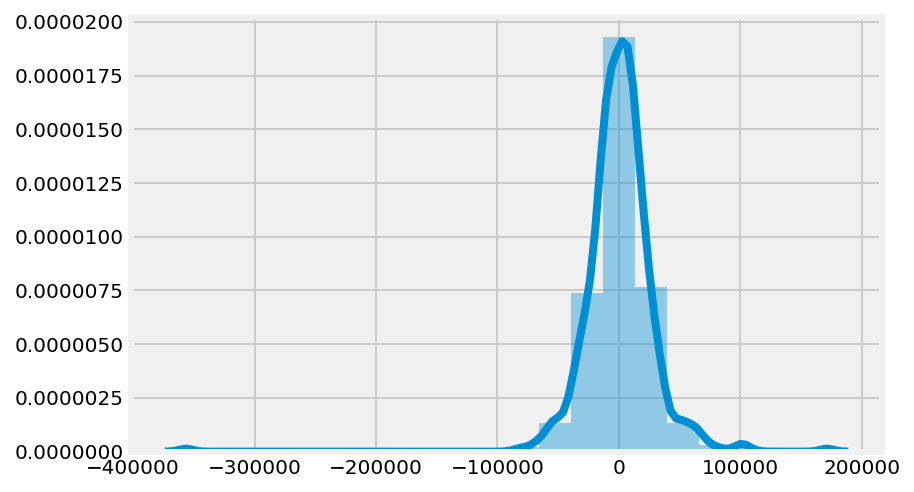

In [38]:
sns.distplot(resd,bins=20);

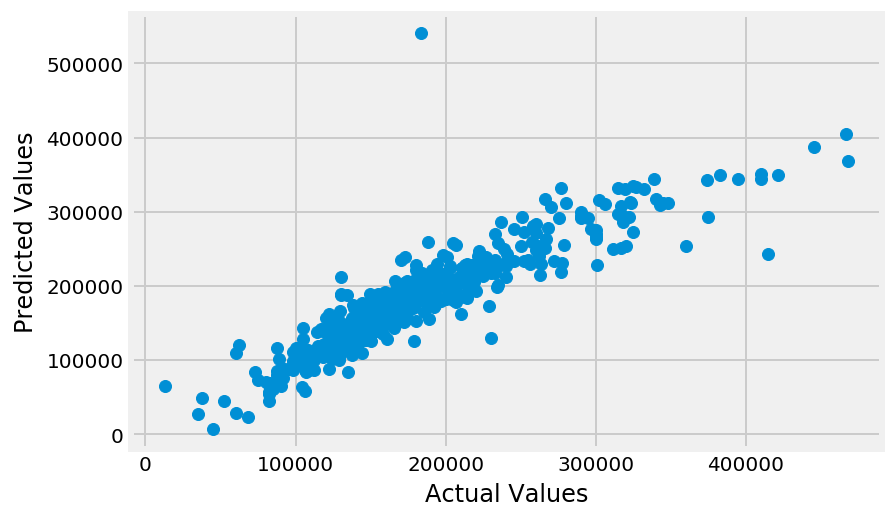

In [39]:
plt.scatter(y_test,y_preds);
plt.xlabel("Actual Values");
plt.ylabel("Predicted Values");

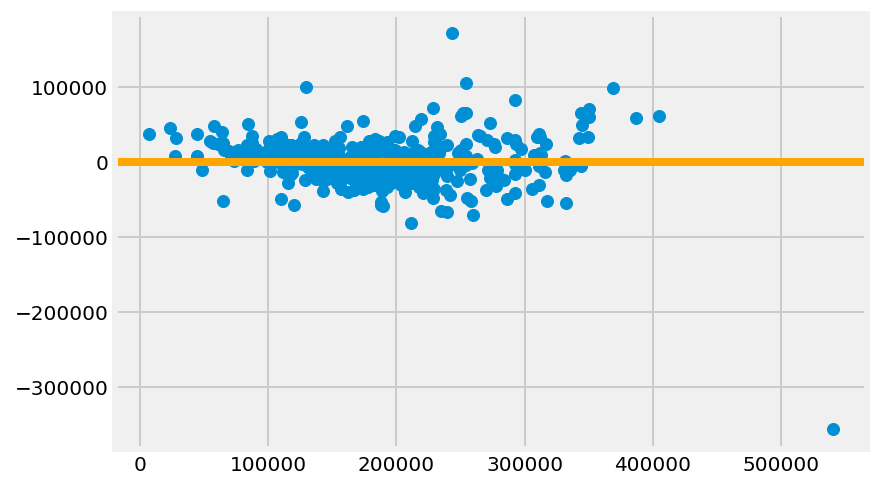

In [40]:
plt.scatter(y_preds, resd);
plt.axhline(0, color='orange');

**Observation : Although it can't be concluded with certainity however, distribution Curve of residuals being very close to normal, scatter plot along with actual values being very close to linear shape and scatter plot with predicted values being symetrical roughly indicates that model is quite well balanced and will generalize quite well. Next step will be to apply regularization techniques to incease optimal level of penality or bias and improve independence among the predictors to improve generalization of the model**

## 4 - Regularization of Model
### 4.1 Ridge CV Model 

In [41]:
#Ridge CV Regression to find optimum alpha value and scores. 
# using logspace range for alpha in the case ridge regressionNote: 
ridgeCV = RidgeCV(alphas=np.logspace(0.1, 10, 100),cv=5)
ridgeCV.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.25892541e+00, 1.58489319e+00, 1.99526231e+00, 2.51188643e+00,
       3.16227766e+00, 3.98107171e+00, 5.01187234e+00, 6.30957344e+00,
       7.94328235e+00, 1.00000000e+01, 1.25892541e+01, 1.58489319e+01,
       1.99526231e+01, 2.51188643e+01, 3.16227766e+01, 3.98107171e+01,
       5.01187234e+01, 6.30957344e+01, 7.94328235e+01, 1.00000000e+02,
       1.25892541e+02, 1.58489319e+0...
       1.25892541e+08, 1.58489319e+08, 1.99526231e+08, 2.51188643e+08,
       3.16227766e+08, 3.98107171e+08, 5.01187234e+08, 6.30957344e+08,
       7.94328235e+08, 1.00000000e+09, 1.25892541e+09, 1.58489319e+09,
       1.99526231e+09, 2.51188643e+09, 3.16227766e+09, 3.98107171e+09,
       5.01187234e+09, 6.30957344e+09, 7.94328235e+09, 1.00000000e+10]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [42]:
# A:
print (f'Optimal alpha value suggested by ridgeCV with cv=5: {ridgeCV.alpha_}')
#ridge scoring on trained data
print (f'R2 score from ridgeCV model with CV=5 on X_train_scaled: {ridgeCV.score(X_train_scaled, y_train)}')
#R2 score for test data using lasso
print (f'R2 score from ridgeCV model with CV=5 on X_test_scaled: {ridgeCV.score(X_test_scaled, y_test)}')
#MSE score for train data using lasso
print (f'MSE from ridgeCV on X_train_scaled: {metrics.mean_squared_error(y_train, ridgeCV.predict(X_train_scaled))}') 
#MSE score for predict data using lasso
print (f'MSE from ridgeCV on X_test_scaled: {metrics.mean_squared_error(y_test, ridgeCV.predict(X_test_scaled))}') 
#RMSE score for predict data using lasso
print (f'RMSE from ridgeCV on X_test_scaled: {math.sqrt(metrics.mean_squared_error(y_test, ridgeCV.predict(X_test_scaled)))}') 


Optimal alpha value suggested by ridgeCV with cv=5: 398.1071705534973
R2 score from ridgeCV model with CV=5 on X_train_scaled: 0.8629281222657397
R2 score from ridgeCV model with CV=5 on X_test_scaled: 0.8160483447876532
MSE from ridgeCV on X_train_scaled: 780864101.5884181
MSE from ridgeCV on X_test_scaled: 893154257.6903589
RMSE from ridgeCV on X_test_scaled: 29885.68650190855


**RMSE for ridgeCV model is 29885, which is slightly better than LR model score and reduced diffrence between MSE scores of train and validation data indicates that model is even more balanced.**

### 4.2 LassoCV Model 

In [43]:
# A:
#Lasso Regression 
#lassoCV = lassoCV()
lassoCV = LassoCV(n_alphas=100, cv=5,verbose=0)
lassoCV.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=0)

In [44]:
# Display lassoCV's optimal alpha_
print (f'Optimal alpha value suggested by lassoCV with cv=5: {lassoCV.alpha_}')
#R2 score for train data using lasso
print (f'R2 score from lassoCV model with CV=5 on X_train_scaled:{lassoCV.score(X_train_scaled, y_train)}')
#R2 score for test data using lasso
print (f'R2 score from lassoCV model with CV=5 on X_test_scaled:{lassoCV.score(X_test_scaled, y_test)}')
#MSE score for train data using lassoCV
print (f'MSE from lassoCV on X_train_scaled: {metrics.mean_squared_error(y_train, lassoCV.predict(X_train_scaled))}')
#MSE score for test data using lasso
print (f'MSE from lassoCV on X_test_scaled:{metrics.mean_squared_error(y_test, lassoCV.predict(X_test_scaled))}')
print (f'RMSE from lassoCV on X_test_scaled:{math.sqrt(metrics.mean_squared_error(y_test, lassoCV.predict(X_test_scaled)))}')

Optimal alpha value suggested by lassoCV with cv=5: 762.4727401079197
R2 score from lassoCV model with CV=5 on X_train_scaled:0.8649475393461086
R2 score from lassoCV model with CV=5 on X_test_scaled:0.8183342390822687
MSE from lassoCV on X_train_scaled: 769359989.0727081
MSE from lassoCV on X_test_scaled:882055383.8068427
RMSE from lassoCV on X_test_scaled:29699.41723008791


### LassoCV RMSE score of 29699 is only slightly better than RidgeCV.

In [45]:
# Extracting the features with lassoCV.Coef_ value as zero
features_coef = pd.DataFrame(lassoCV.coef_, X_train.columns, columns=['Coeff'])
zero_coef = pd.DataFrame(features_coef[abs(features_coef['Coeff']) == 0])
print(zero_coef)
print('No. of features with zero lassoCV Coef :',len(pd.DataFrame(features_coef[abs(features_coef['Coeff']) == 0])))

                      Coeff
Lot Shape               0.0
Bsmt Cond              -0.0
Total Bsmt SF           0.0
Central Air             0.0
Full Bath               0.0
garage_age             -0.0
Neighborhood_BrkSide    0.0
Neighborhood_CollgCr    0.0
Neighborhood_Gilbert   -0.0
Neighborhood_Greens    -0.0
Neighborhood_Mitchel   -0.0
Neighborhood_NAmes      0.0
Neighborhood_NWAmes    -0.0
Neighborhood_SWISU     -0.0
Neighborhood_Sawyer    -0.0
Foundation_CBlock      -0.0
Foundation_Stone        0.0
No. of features with zero lassoCV Coef : 17


In [46]:
zero_coef_list = zero_coef.index
zero_coef_list

Index(['Lot Shape', 'Bsmt Cond', 'Total Bsmt SF', 'Central Air', 'Full Bath',
       'garage_age', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Foundation_CBlock', 'Foundation_Stone'],
      dtype='object')

In [47]:
# list of features with coef not equal to zero. 
selected_feat_coef = pd.DataFrame(features_coef[abs(features_coef['Coeff']) != 0]).sort_values('Coeff')
selected_feat_coef.count()

Coeff    35
dtype: int64

In [48]:
selected_coef_list = selected_feat_coef.index
selected_coef_list

Index(['vintage', 'new_age', 'Neighborhood_BrDale', 'Neighborhood_SawyerW',
       'Neighborhood_Edwards', 'Neighborhood_NPkVill', 'Neighborhood_OldTown',
       'Neighborhood_Blueste', 'Neighborhood_MeadowV', 'Neighborhood_IDOTRR',
       'Neighborhood_Veenker', 'Foundation_PConc', 'Foundation_Slab',
       'Neighborhood_ClearCr', 'Neighborhood_Somerst', 'Neighborhood_Timber',
       'BsmtFin Type 1', 'Mas Vnr Area', 'Heating QC', 'TotRms AbvGrd',
       'Neighborhood_Crawfor', 'Garage Area', 'Lot Area',
       'Neighborhood_NoRidge', 'Garage Cars', 'Bsmt Qual', 'Fireplaces',
       'Neighborhood_StoneBr', 'BsmtFin SF 1', '1st Flr SF', 'Exter Qual',
       'Kitchen Qual', 'Neighborhood_NridgHt', 'Gr Liv Area', 'Overall Qual'],
      dtype='object')

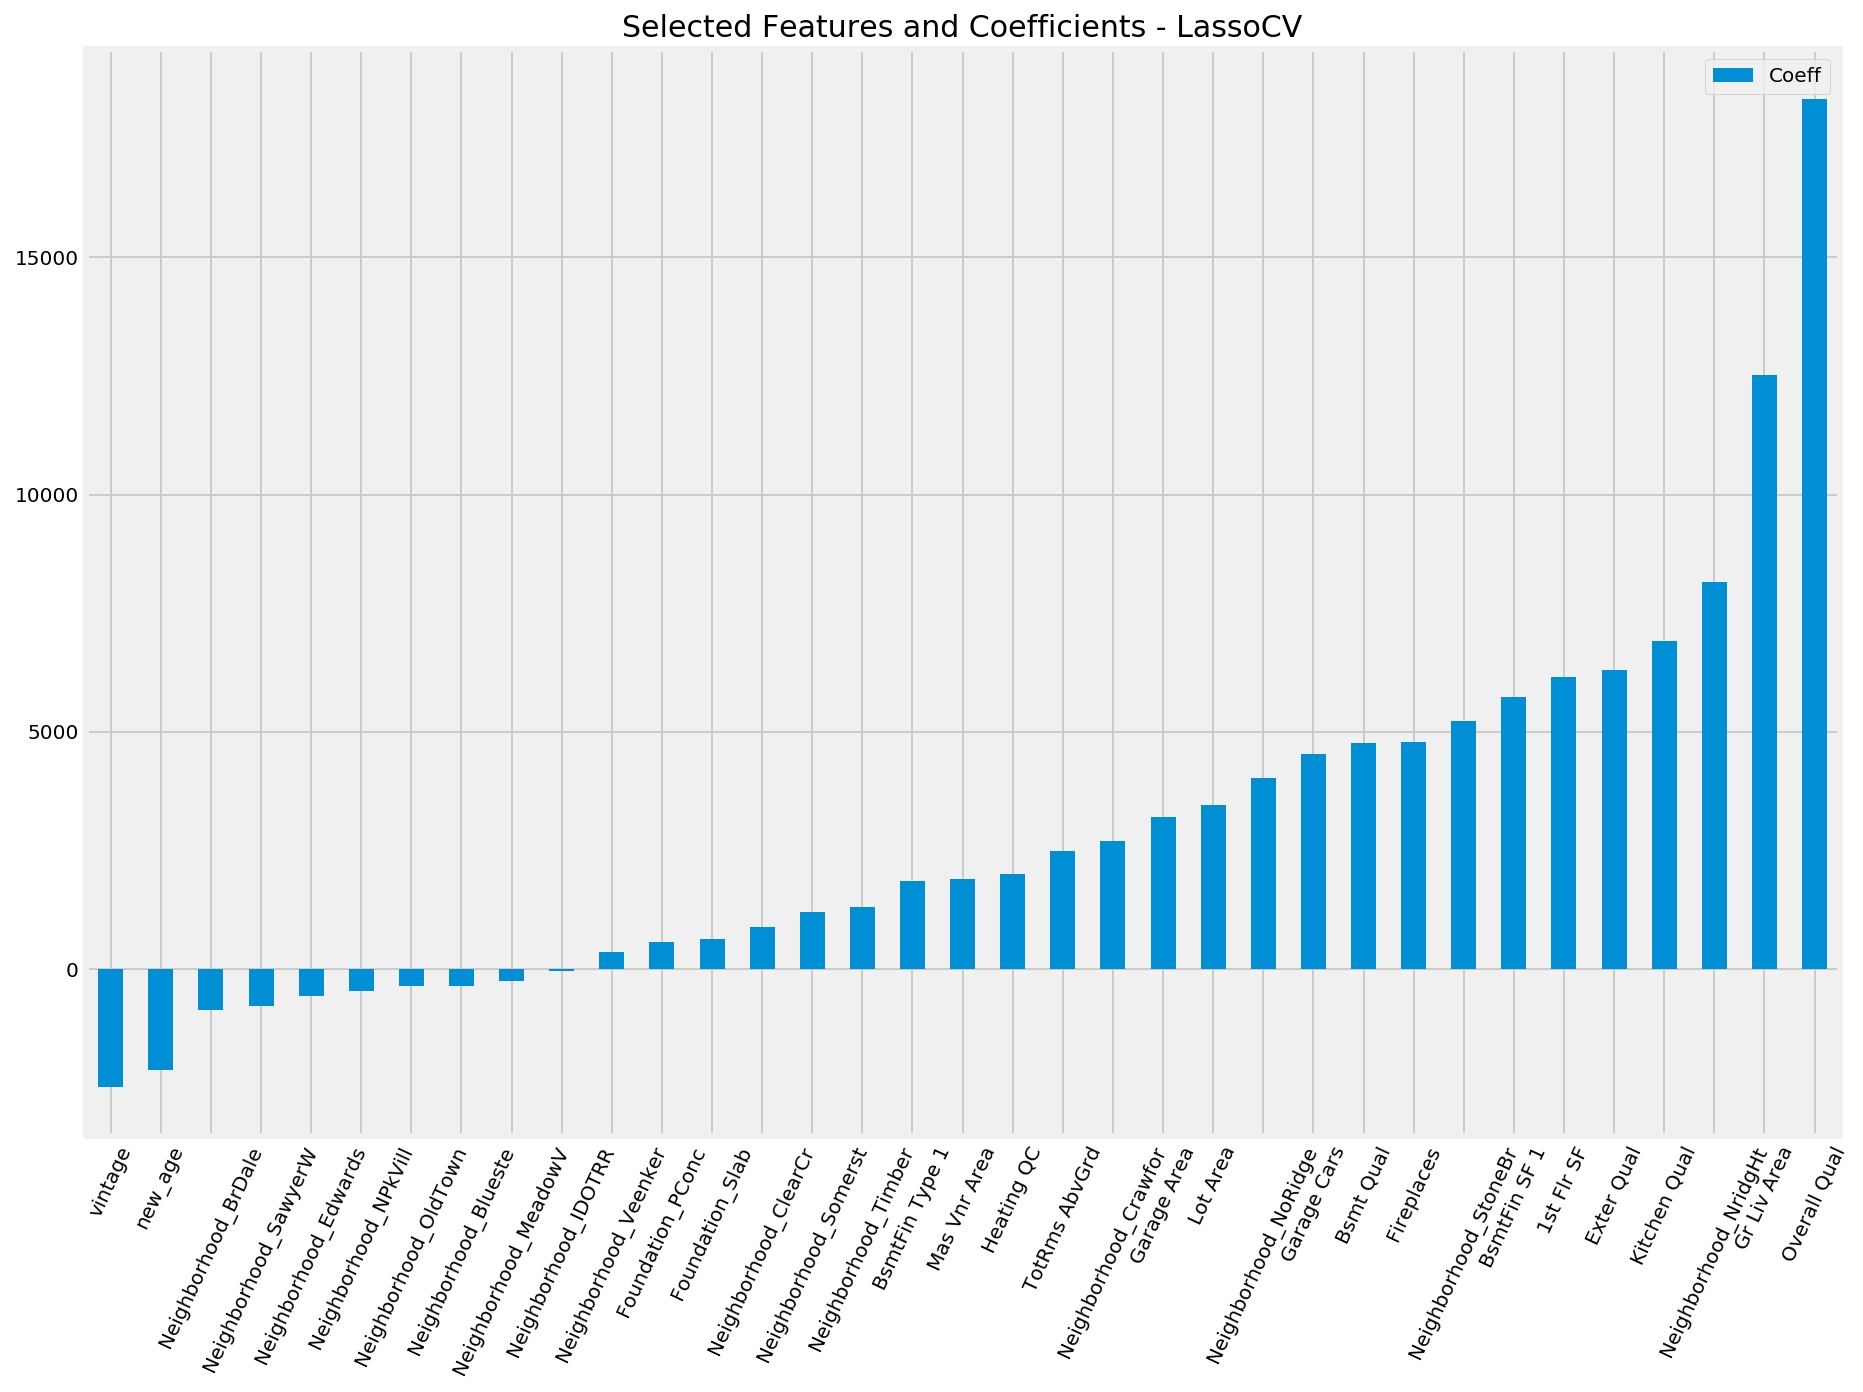

In [49]:
selected_feat_coef.plot(kind='bar',figsize=(14,10));
plt.title('Selected Features and Coefficients - LassoCV',fontsize = 15);
plt.xticks(rotation=65);

### Observations:
- LassoCV model has computed 17 features with zero cofficients and 35 features - or + value of coeficients.
- While 'Garage Area' had higher corr coef with SalePrice, however 'Lot Area' has higher lassCv coef than 'Garage Area'. That could be explained due to high collinearity between 'Garage Area' and 'Garage Cars'.

### 4.3 ElasticNet CV Model 

In [50]:
#ElasticNet Regression with 50:50 LAsso:Ridge ratio
enet = ElasticNetCV(l1_ratio=0.5, n_alphas=100, cv=5,verbose=1)
enet.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=1)

In [51]:
print (f'Optimal alpha value suggested by ElasticNetCV With cv=5: {enet.alpha_}')
#lasso scoring on trained data
print (f'R2 score from ElasticNet CV model with CV=5 on X_train_scaled: {enet.score(X_train_scaled, y_train)}')
#R2 score for test data using lasso
print (f'R2 score from ElasticNet CV model with CV=5 on X_test_scaled: {enet.score(X_test_scaled, y_test)}')
#MSE score for train data using enet
print (f'MSE from ElasticNetCV on X_train_scaled: {metrics.mean_squared_error(y_train, enet.predict(X_train_scaled))}')
#MSE score for test data using enet
print (f'MSE from ElasticNetCV on X_test_scaled: {metrics.mean_squared_error(y_test, enet.predict(X_test_scaled))}')
print (f'RMSE from ElasticNetCV on X_test_scaled: {math.sqrt(metrics.mean_squared_error(y_test, enet.predict(X_test_scaled)))}')


Optimal alpha value suggested by ElasticNetCV With cv=5: 123.69302942764524
R2 score from ElasticNet CV model with CV=5 on X_train_scaled: 0.20985665080001803
R2 score from ElasticNet CV model with CV=5 on X_test_scaled: 0.21097576240143778
MSE from ElasticNetCV on X_train_scaled: 4501248444.960153
MSE from ElasticNetCV on X_test_scaled: 3831008513.723579
RMSE from ElasticNetCV on X_test_scaled: 61895.141277192175


#### With 50:50 ratio of Lasso and Ridge the RMSE score as actually to 61895. 

In [52]:
#ElasticNet Regression with 90:10 Lasso:Ridge ratio
enet = ElasticNetCV(l1_ratio=0.9, n_alphas=100, cv=5,verbose=1)
enet.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=0.9, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=1)

In [53]:
print (f'Optimal alpha value suggested by ElasticNetCV With cv=5: {enet.alpha_}')
#lasso scoring on trained data
print (f'R2 score from ElasticNet CV model with CV=5 on X_train_scaled: {enet.score(X_train_scaled, y_train)}')
#R2 score for test data using lasso
print (f'R2 score from ElasticNet CV model with CV=5 on X_test_scaled: {enet.score(X_test_scaled, y_test)}')
#MSE score for train data using enet
print (f'MSE from ElasticNetCV on X_train_scaled: {metrics.mean_squared_error(y_train, enet.predict(X_train_scaled))}')
#MSE score for test data using enet
print (f'MSE from ElasticNetCV on X_test_scaled: {metrics.mean_squared_error(y_test, enet.predict(X_test_scaled))}')
print (f'RMSE from ElasticNetCV on X_test_scaled: {math.sqrt(metrics.mean_squared_error(y_test, enet.predict(X_test_scaled)))}')



Optimal alpha value suggested by ElasticNetCV With cv=5: 68.7183496820251
R2 score from ElasticNet CV model with CV=5 on X_train_scaled: 0.6842997507819564
R2 score from ElasticNet CV model with CV=5 on X_test_scaled: 0.6735451454688607
MSE from ElasticNetCV on X_train_scaled: 1798465123.2020822
MSE from ElasticNetCV on X_test_scaled: 1585060721.153018
RMSE from ElasticNetCV on X_test_scaled: 39812.82106499134


#### With 90:10 ratio of Lasso and Ridge the RMSE score has dropped to 39812, however is still higher than the score from LassoCV.

## 5 - Applying LassoCv model to Test dataset for final Prediction and Submission

In [54]:
# using LassoCV model for final prediction on the test data  
y_preds =lassoCV.predict(test_scaled)

In [55]:
y_preds.shape

(879,)

In [56]:
# Building a dataframe with required format by kaggle and storing it to .csv file for submission to Kaggle.
submission_lassoCV = pd.DataFrame({
        "Id": orig_test["Id"],
        "SalePrice": y_preds})

submission_lassoCV.to_csv('../datasets/submission_lassoCV.csv', index=False)

In [57]:
submission_lassoCV

,Id,SalePrice
0,2658,128276.425504
1,2718,171533.023888
2,2414,212321.045617
3,1989,122499.463941
4,625,180818.432268
...,...,...
874,1662,179488.007723
875,1234,214614.418544
876,1373,131917.914210
877,1672,109523.149854


##  Return to Main notebook
